# **MNIST Fashion Item Classification with a Convolutional Neural Network (CNN) Using TensorFlow and Keras**
*By Carlos Santiago Bañón*

* **Year:** 2020
* **Technologies:** Python, NumPy, Matplotlib, TensforFlow, Keras
* **Areas:** Computer Vision, Deep Learning
* **Keywords:** `classification`, `cnn`, `computer-vision`, `convolution`, `convolutional-neural-network`, `deep-learning`, `fully-connected`, `max-pooling`, `mnist`, `multi-class-classification`, `neural-network`, `2d-convolution`, `2d-max-pooling`
* **Description:** This notebook presents an MNIST fashion item classifier built with a convolutional neural network (CNN) in TensorFlow and Keras.

## 1. Import Statements

---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%tensorflow_version 2.x
import tensorflow as tf

## 2. Data Preprocessing

---



The first step is to preprocess our data. Here, we load the MNIST fashion dataset from the Keras datasets library, split it into training and test sets, and normalize the matrices.

In [ ]:
# Load the MNIST dataset.
fashion_mnist = tf.keras.datasets.fashion_mnist
train_data, test_data = fashion_mnist.load_data()

In [ ]:
# Divide the data into features and labels.
train_images, y_train = train_data
test_images, y_test = test_data

In [ ]:
# Reshape and normalize the images.
X_train = train_images.reshape((60000, 28, 28, 1))
X_train = X_train.astype('float32') / 255
X_test = test_images.reshape((10000, 28, 28, 1))
X_test = X_test.astype('float32') / 255

Further, the following are the shapes of each matrix, as well as a visualization of a random MNIST fashion item.

In [ ]:
# Show the shapes of the data.
print("Training Images:", X_train.shape)
print("Testing Images:", X_test.shape)
print("Training Labels:", y_train.shape)
print("Test Labels:", y_test.shape)

Training Images: (60000, 28, 28, 1)
Testing Images: (10000, 28, 28, 1)
Training Labels: (60000,)
Test Labels: (10000,)


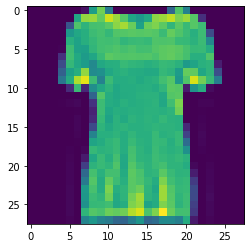

In [ ]:
# Show a sample MNIST fashion item.
plt.imshow(train_images[10])
plt.show()

Finally, we define the corresponding item names for each class.

In [ ]:
# Define the class names.
class_names = ['T-Shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

## 3. Neural Network

---



### 3.1. Define the Model

We then have to define our neural network. Here, we define a sequential model with two fully-connected layers.

In [ ]:
# Define the sequential model.
model = tf.keras.models.Sequential()

In [ ]:
# Define the network's layes.
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
# Show the model.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

Once our model is defined, we can compile it using the Adam optimizer and the categorical cross-entropy loss function.

In [ ]:
# Compile the model.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 3.2. Train the Model

We then train the model on 20 epochs, using a batch size of 256.

In [ ]:
# Define the parameters.
num_epochs = 10
batch_size = 256

# Train the model.
history = model.fit(X_train, 
                      y_train, 
                      epochs=num_epochs, 
                      batch_size=batch_size, 
                      validation_data=(X_test, y_test))

Epoch 1/10
235/235 [==============================] - 41s 174ms/step - loss: 0.7152 - accuracy: 0.7345 - val_loss: 0.4846 - val_accuracy: 0.8197
Epoch 2/10
235/235 [==============================] - 40s 171ms/step - loss: 0.4144 - accuracy: 0.8494 - val_loss: 0.4058 - val_accuracy: 0.8499
Epoch 3/10
235/235 [==============================] - 40s 171ms/step - loss: 0.3503 - accuracy: 0.8734 - val_loss: 0.3887 - val_accuracy: 0.8610
Epoch 4/10
235/235 [==============================] - 40s 171ms/step - loss: 0.3217 - accuracy: 0.8829 - val_loss: 0.3365 - val_accuracy: 0.8781
Epoch 5/10
235/235 [==============================] - 40s 170ms/step - loss: 0.2969 - accuracy: 0.8919 - val_loss: 0.3202 - val_accuracy: 0.8865
Epoch 6/10
235/235 [==============================] - 40s 170ms/step - loss: 0.2817 - accuracy: 0.8976 - val_loss: 0.3210 - val_accuracy: 0.8854
Epoch 7/10
235/235 [==============================] - 40s 169ms/step - loss: 0.2624 - accuracy: 0.9057 - val_loss: 0.3077 - val_ac

### 3.4. Display the Metrics

Finally, we display the metrics. We begin by displaying the model's accuracy and loss based on the test set.

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_accuracy)
print('Test Loss:', test_loss)

313/313 [==============================] - 3s 11ms/step - loss: 0.2902 - accuracy: 0.8916
Test Accuracy: 0.8916000127792358
Test Loss: 0.2902173697948456


Then, we save the metric values for each epoch to plot the loss and accuracy curves for our model.

In [ ]:
# Save the metrics.
metrics = history.history

Finally, once we have our metric history, we can plot the curves.

In [ ]:
# Save the loss values.
training_loss_list = metrics['loss']
test_loss_list = metrics['val_loss']

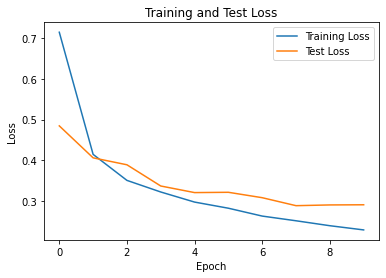

In [ ]:
# Plot the training and test loss.
x = np.arange(0, num_epochs, 1)
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(x, training_loss_list, label='Training Loss')
plt.plot(x, test_loss_list, label='Test Loss')
plt.legend()
plt.show()

In [ ]:
train_accuracy_list = metrics['accuracy']
test_accuracy_list = metrics['val_accuracy']

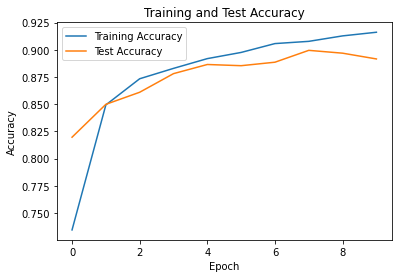

In [ ]:
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(x, train_accuracy_list, label='Training Accuracy')
plt.plot(x, test_accuracy_list, label='Test Accuracy')
plt.legend()
plt.show()

## 4. Make a Prediction

---



Once our model is trained, we can use it to make predictions. To do this, we first use our test set to predict the classes.

In [ ]:
# Make predictions with the trained model.
predictions = model.predict(X_test)

Finally, we can show a random test image with its corresponding prediction.

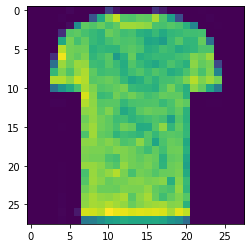

In [ ]:
# Choose an index.
index = 125

# Show an image from the test set.
plt.imshow(test_images[index])
plt.show()

In [ ]:
print("Prediction:", class_names[np.argmax(predictions[index])])

Prediction: T-Shirt/Top
